https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import style
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install Kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.5 MB/s eta 0:00:00


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

/home/llanosrenzo/anaconda3/envs/py3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 70.6k/70.6k [00:00<00:00, 301kB/s]

Extracting files...
Path to dataset files: /home/llanosrenzo/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


In [9]:
df = pd.read_csv('/home/llanosrenzo/MobilePrice/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [29]:
df.columns[:-1].values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'], dtype=object)

In [30]:
var_continua = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt',
                'pc','px_height','px_width','sc_h','sc_w',]

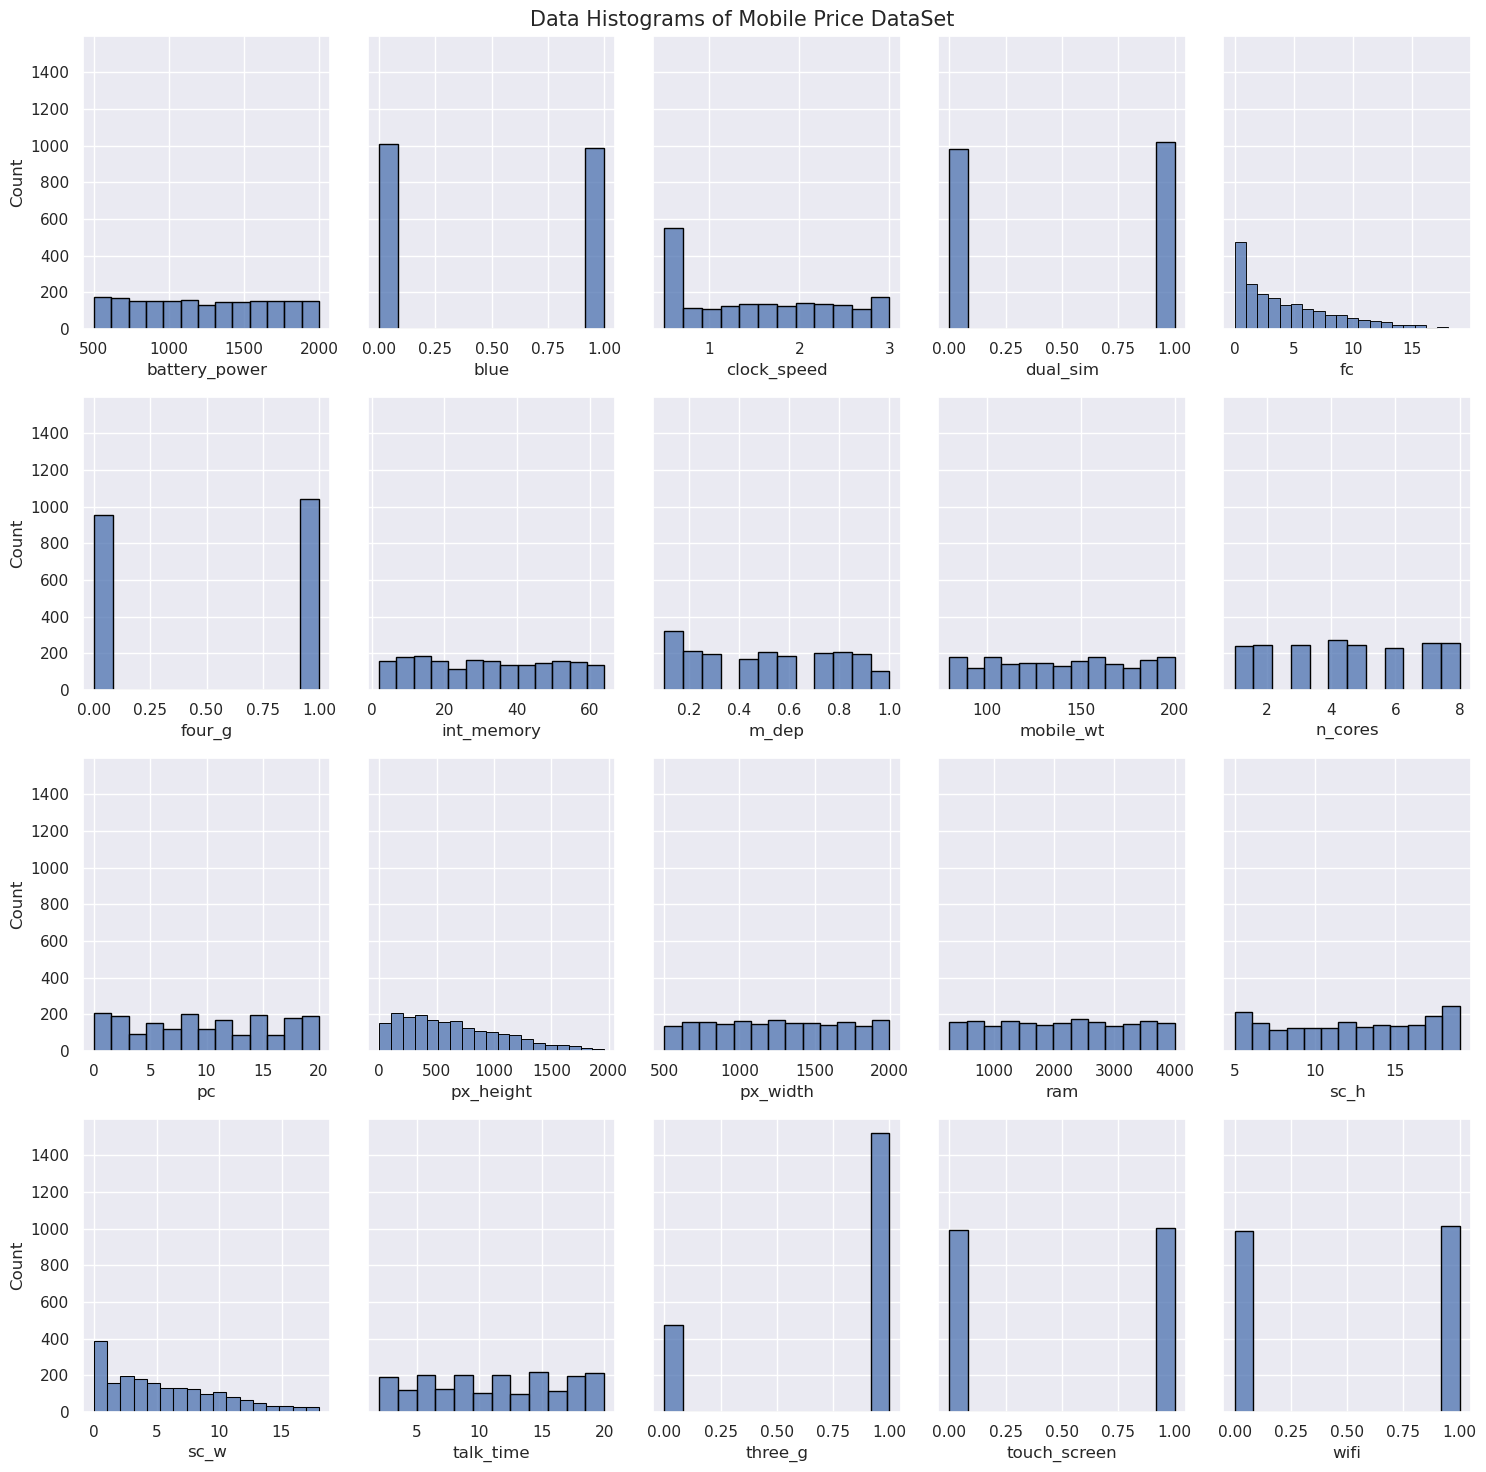

In [23]:
fig ,ax = plt.subplots(nrows= 4,ncols = 5, figsize = (15,15),
                       sharey = True #significa que todas las subtramas que están en la misma fila comparten el mismo eje Y
                       )
fig.suptitle('Data Histograms of Mobile Price DataSet',fontsize = 15)
sns.set_theme(style = 'darkgrid')
variables = df.columns[:-1].values
c=0
for i in np.arange(4):
    for j in np.arange(5):
        if c < 20:
            sns.histplot(ax= ax[i,j],data = df,x = df[variables[c]],
                         edgecolor = 'black')
            c+=1
plt.tight_layout()
plt.show()

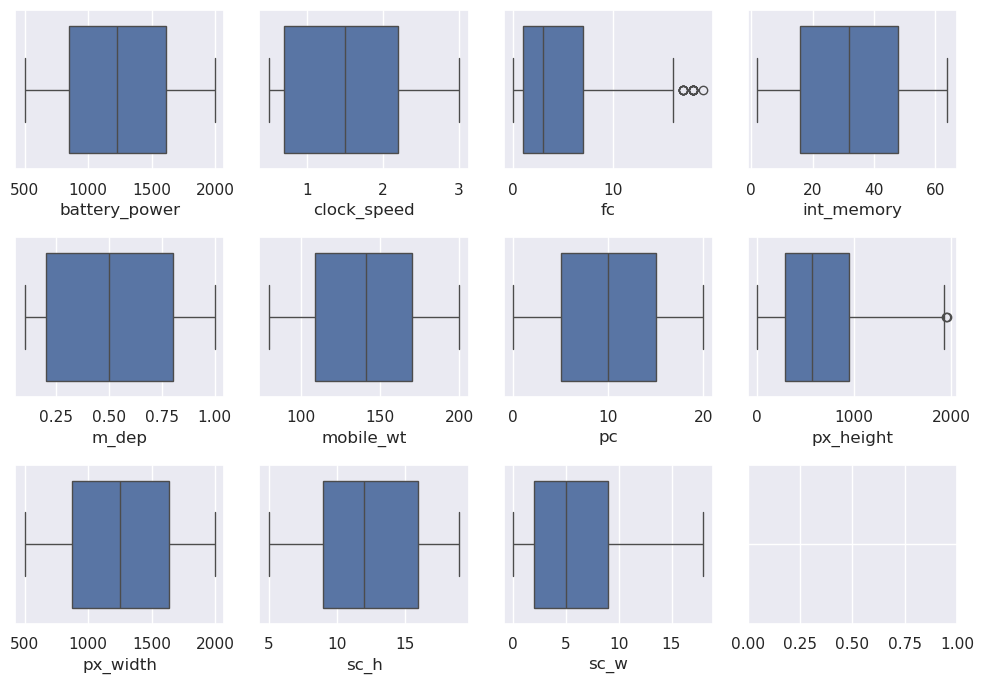

In [34]:
fig , ((ax0,ax1,ax2,ax3),(ax4,ax5,ax6,ax7),(ax8,ax9,ax10,ax11)) = plt.subplots(nrows = 3, ncols = 4,figsize = (10,7),sharey = True)
# plt.subplots_adjust(bottom=0.0005,#Controla el espacio en la parte inferior de las subtramas.
#                     right= 1,#Controla el espacio en el lado derecho de las subtramas.
#                     top=1 #Controla el espacio en la parte superior de las subtramas.
#                     )

columns  = var_continua
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for v,i in enumerate(columns):
    sns.boxplot(x = i,data = df,ax=axes[v],palette='deep')
    plt.tight_layout()
plt.tight_layout()
plt.show()

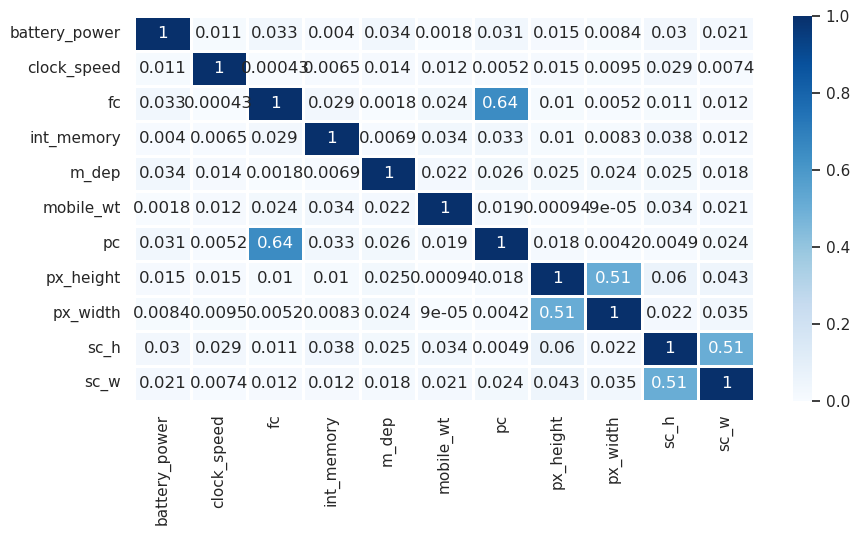

In [36]:
plt.figure(figsize = (10,5))
sns.heatmap(df[var_continua].corr().abs(),annot = True, linewidths =2,vmin =0,vmax =1,cmap = 'Blues')
plt.show()

In [ ]:
sns.pairplot(df[var_continua],diag_kind='kde')
plt.show()

In [40]:
df.drop(columns=['px_height','sc_h','fc'],inplace=True)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder, LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE

In [42]:
df

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0,7,0.6,188,2,2,756,2549,7,19,0,0,1,1
1,1021,1,0.5,1,1,53,0.7,136,3,6,1988,2631,3,7,1,1,0,2
2,563,1,0.5,1,1,41,0.9,145,5,6,1716,2603,2,9,1,1,0,2
3,615,1,2.5,0,0,10,0.8,131,6,9,1786,2769,8,11,1,0,0,2
4,1821,1,1.2,0,1,44,0.6,141,2,14,1212,1411,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,1,2,0.8,106,6,14,1890,668,4,19,1,1,0,0
1996,1965,1,2.6,1,0,39,0.2,187,4,3,1965,2032,10,16,1,1,1,2
1997,1911,0,0.9,1,1,36,0.7,108,8,3,1632,3057,1,5,1,1,0,3
1998,1512,0,0.9,0,1,46,0.1,145,5,5,670,869,10,19,1,1,1,0


In [43]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_width', 'ram',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [50]:
var_transformer = ['battery_power','clock_speed','int_memory','mobile_wt','n_cores','pc','px_width','ram','sc_w','talk_time']

In [51]:
num_transf_1 = Pipeline(
    steps = [
        ('encoder',PowerTransformer())
    ]
)

In [52]:
preprocessor = ColumnTransformer(transformers= [
    ('num_transf',num_transf_1,var_transformer)
])


In [53]:
pipeline = Pipeline(
    steps = [('preprocessor',preprocessor)]
)
pt_fit = pipeline.fit(df)

In [55]:
pt_fit

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('encoder',
                                                                   PowerTransformer())]),
                                                  ['battery_power',
                                                   'clock_speed', 'int_memory',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_width', 'ram', 'sc_w',
                                                   'talk_time'])]))])

In [59]:
df_transf = pd.DataFrame(pt_fit.transform(df),columns=pt_fit.get_feature_names_out().tolist())
display(df_transf.head(3))
print(df_transf.shape)

,num_transf__battery_power,num_transf__clock_speed,num_transf__int_memory,num_transf__mobile_wt,num_transf__n_cores,num_transf__pc,num_transf__px_width,num_transf__ram,num_transf__sc_w,num_transf__talk_time
0,-0.882102,0.864859,-1.478784,1.320391,-1.103136,-1.351153,-1.156055,0.444771,0.464020,1.387539
1,-0.443319,-1.349676,1.109283,-0.084928,-0.618098,-0.561397,1.620649,0.513836,-0.486762,-0.685321
2,-1.631335,-1.349676,0.550845,0.167480,0.263015,-0.561397,1.062404,0.490319,-0.812923,-0.299422


(2000, 10)


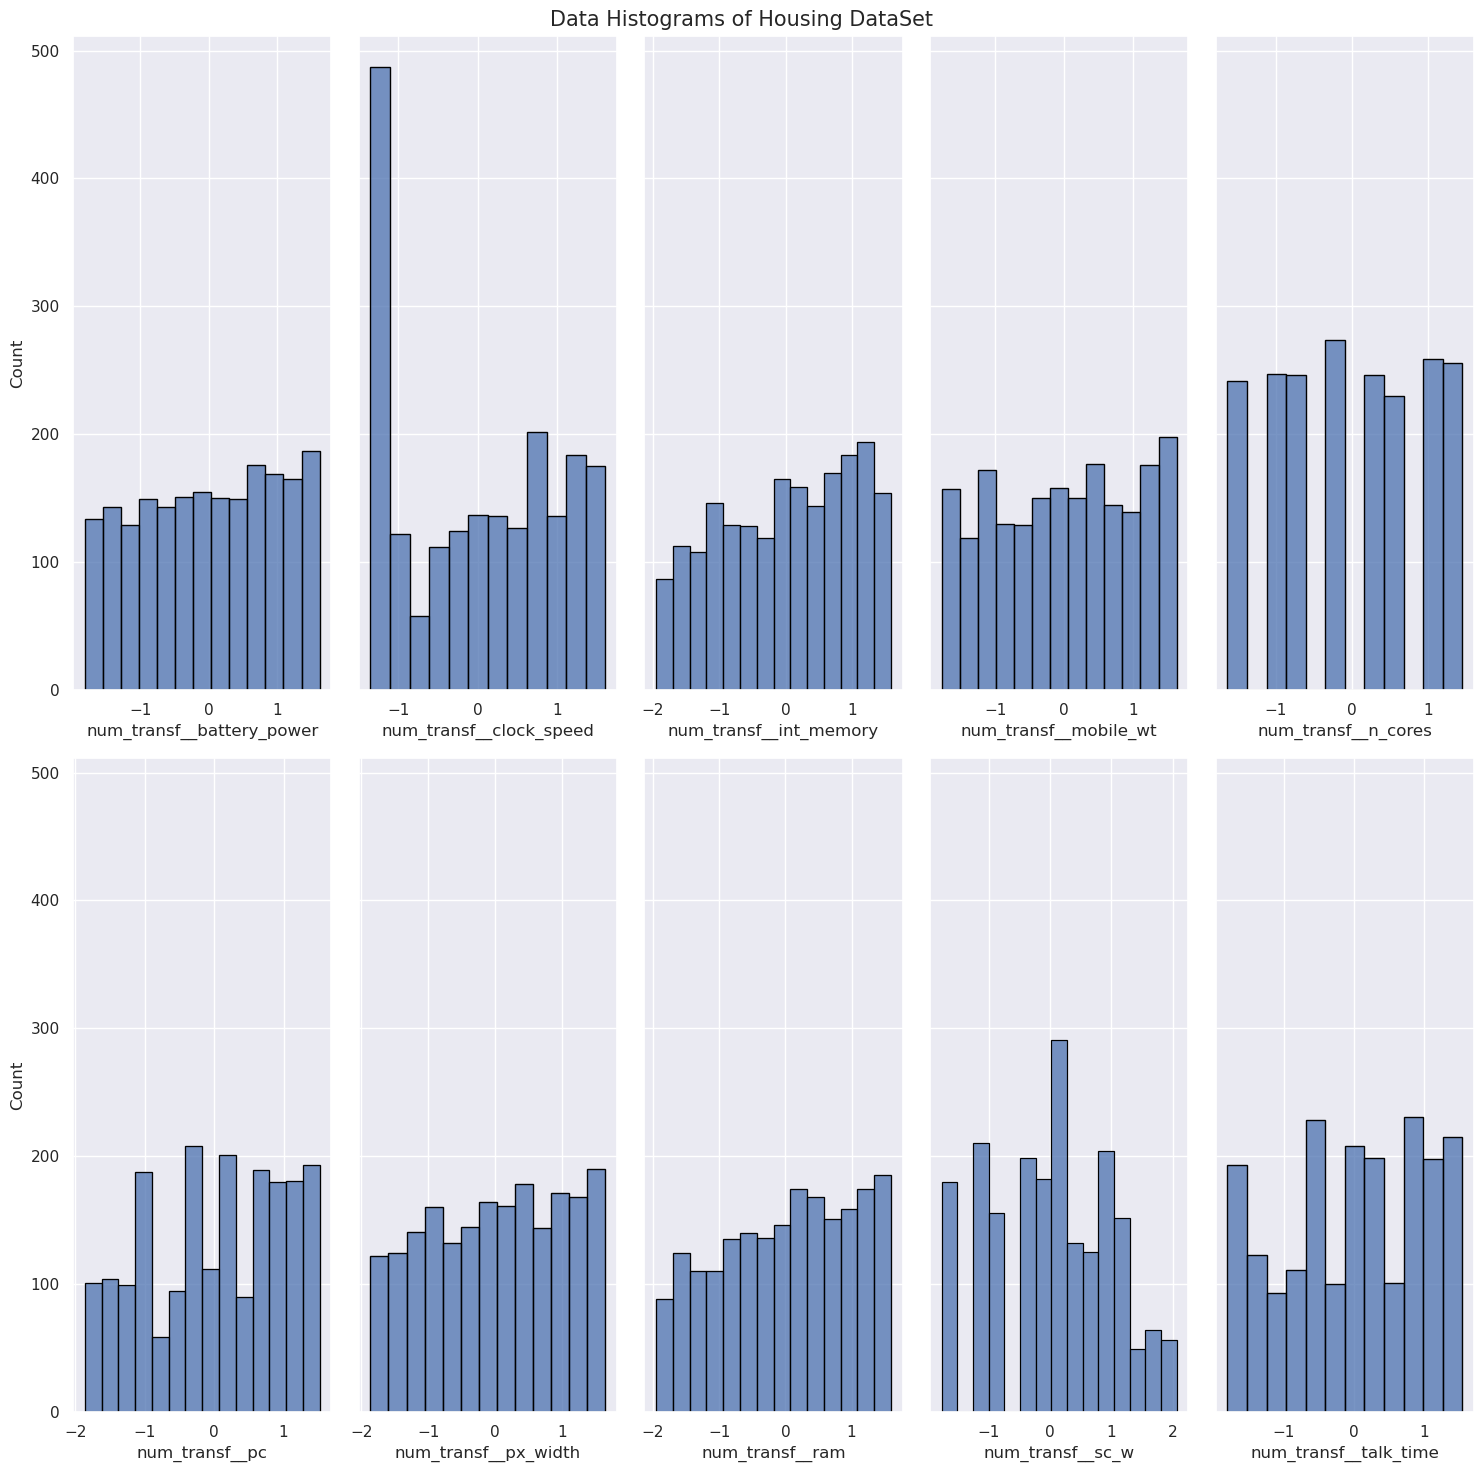

In [63]:
fig ,ax = plt.subplots(nrows= 2,ncols = 5, figsize = (15,15),
                       sharey = True 
                       )
fig.suptitle('Data Histograms of Housing DataSet',fontsize = 15)
sns.set_theme(style = 'darkgrid')
variables = df_transf.columns.values
c=0
for i in np.arange(2):
    for j in np.arange(5):
        if c < 10:
            sns.histplot(ax= ax[i,j],data = df_transf,x = variables[c],
                         edgecolor = 'black')
            c+=1
plt.tight_layout()
plt.show()

In [64]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_width', 'ram',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [65]:
df_transf.columns

Index(['num_transf__battery_power', 'num_transf__clock_speed',
       'num_transf__int_memory', 'num_transf__mobile_wt',
       'num_transf__n_cores', 'num_transf__pc', 'num_transf__px_width',
       'num_transf__ram', 'num_transf__sc_w', 'num_transf__talk_time'],
      dtype='object')

In [66]:
df = pd.concat([df_transf,df[['blue','dual_sim','four_g','m_dep','three_g','touch_screen','wifi','price_range']]],axis = 1)
df.head(3)

,num_transf__battery_power,num_transf__clock_speed,num_transf__int_memory,num_transf__mobile_wt,num_transf__n_cores,num_transf__pc,num_transf__px_width,num_transf__ram,num_transf__sc_w,num_transf__talk_time,blue,dual_sim,four_g,m_dep,three_g,touch_screen,wifi,price_range
0,-0.882102,0.864859,-1.478784,1.320391,-1.103136,-1.351153,-1.156055,0.444771,0.464020,1.387539,0,0,0,0.6,0,0,1,1
1,-0.443319,-1.349676,1.109283,-0.084928,-0.618098,-0.561397,1.620649,0.513836,-0.486762,-0.685321,1,1,1,0.7,1,1,0,2
2,-1.631335,-1.349676,0.550845,0.167480,0.263015,-0.561397,1.062404,0.490319,-0.812923,-0.299422,1,1,1,0.9,1,1,0,2


In [67]:
X = df.drop(columns='price_range')
y = df['price_range']
print('Tamaño de carcteristicas: ',X.shape)
print('Tamaño de variable objetivo: ',y.shape)

Tamaño de carcteristicas:  (2000, 17)
Tamaño de variable objetivo:  (2000,)


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [84]:
# Entrenamineto del Arbol de regresion
# ==========================================================================================================
model_tree1 = DecisionTreeClassifier(random_state=42,
                                     max_depth = 4)
model_tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [85]:
pred_train1 = model_tree1.predict(X_train)
print('Mean squared error (MSE): ',mean_squared_error(y_train,pred_train1))
print('Root mean squared error (RMSE): ',np.sqrt(mean_squared_error(y_train,pred_train1)))
print('Valor R-squared de las predicciones: ',round(r2_score(y_train,pred_train1),3))

Mean squared error (MSE):  0.17625
Root mean squared error (RMSE):  0.41982139059366663
Valor R-squared de las predicciones:  0.857


In [86]:
from sklearn import  tree

In [87]:
diagrama_tree = tree.export_text(model_tree1)
print(diagrama_tree)

|--- feature_7 <= 0.16
|   |--- feature_7 <= -0.96
|   |   |--- feature_6 <= 0.81
|   |   |   |--- feature_7 <= -1.27
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  -1.27
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  0.81
|   |   |   |--- feature_0 <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.04
|   |   |   |   |--- class: 0
|   |--- feature_7 >  -0.96
|   |   |--- feature_0 <= -0.48
|   |   |   |--- feature_7 <= -0.46
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  -0.46
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  -0.48
|   |   |   |--- feature_7 <= -0.13
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  -0.13
|   |   |   |   |--- class: 2
|--- feature_7 >  0.16
|   |--- feature_7 <= 0.83
|   |   |--- feature_0 <= -1.60
|   |   |   |--- feature_7 <= 0.67
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.67
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  -1.60
|   |   |   |--- feature_

In [88]:
df.columns

Index(['num_transf__battery_power', 'num_transf__clock_speed',
       'num_transf__int_memory', 'num_transf__mobile_wt',
       'num_transf__n_cores', 'num_transf__pc', 'num_transf__px_width',
       'num_transf__ram', 'num_transf__sc_w', 'num_transf__talk_time', 'blue',
       'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [94]:
from subprocess import check_call
from PIL import Image as PImage

In [97]:
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(model_tree1,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(df.drop(['price_range'], axis=1)),
                              class_names = ['1', '2', '3', '0'],
                              rounded = True,
                              filled= True )
        

In [104]:
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])

0

In [105]:
import subprocess
from PIL import Image  # Asegúrate de importar la clase Image

In [107]:
# Mostrar la imagen
img = Image.open("tree1.png")  # Usa Image.open para abrir la imagen
img.show();

[52282:52308:1029/231907.860677:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.860905:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.860955:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.861030:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.861092:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.884383:ERROR:bus.cc(407)] Failed to connect to the bus: Failed to connect to socket /run/user/1000/bus: No such file or directory
[52282:52308:1029/231907.884458:ERROR:bus.cc(407)] Failed to connect t

In [78]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.4 MB/s eta 0:00:00:00:0100:01


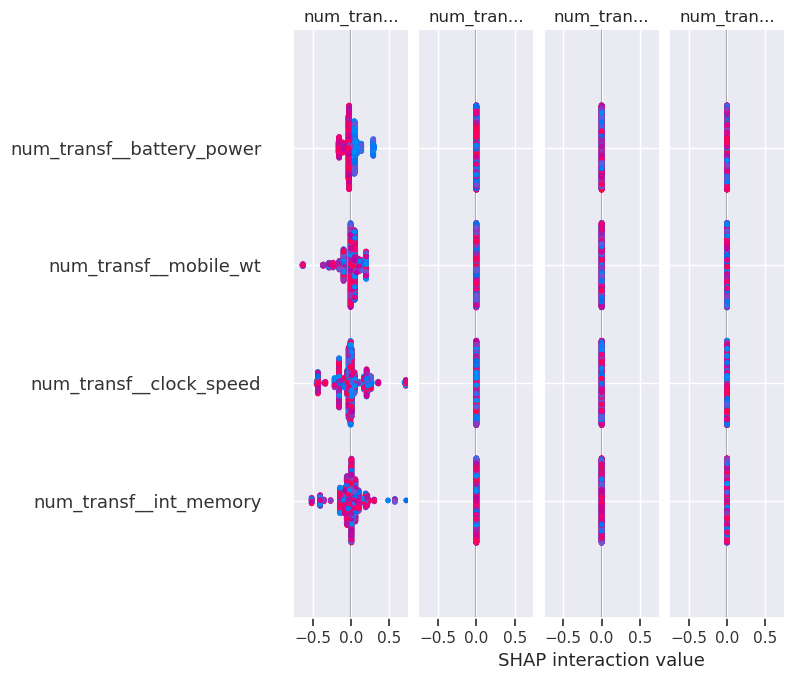

In [108]:
import shap
explainer_km = shap.TreeExplainer(model_tree1)
shap_values_km = explainer_km.shap_values(X_train)
shap.summary_plot(shap_values_km, X_train, plot_type="bar", plot_size=(15, 10))